In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,total_vol,metal_total_conc,K2CO3_total_conc,...,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,destination,XRD,singlephase
0,3.00,0.9,0.15,1.3500,9.00,11.738561,1,9.30,0.100000,0.150000,...,0.952650,1,0.005301,9.928170e-09,-8.003131,4.682620e-07,1,0227-17,"Spinel,ZnO",False
1,0.30,0.9,0.15,1.3500,9.00,11.738561,1,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-19,"Spinel,ZnO",False
2,3.00,1.5,0.15,1.3500,9.00,11.738561,6,9.50,0.160000,0.140000,...,1.222594,1,0.005189,1.490280e-08,-7.826733,7.180060e-07,1,0227-21,"Spinel,?",False
3,0.30,0.9,0.15,1.3500,9.00,11.738561,6,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-23,"Spinel,ZnO",False
4,3.00,1.5,0.45,1.3500,3.00,11.977121,1,3.50,0.430000,0.390000,...,3.324066,1,0.008132,1.541350e-07,-6.812099,4.738780e-06,1,0227-25,"Spinel,Fe2O3",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.17,1.0,0.41,1.5006,3.66,11.956907,6,9.54,0.104822,0.157233,...,0.997544,0,0.003474,2.930080e-09,-8.533121,2.108530e-07,0,0509-#21,NaN,True
66,1.00,0.5,0.15,0.7500,5.00,11.738561,1,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#21,NaN,True
67,1.00,0.5,0.15,0.7500,5.00,11.738561,6,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#22,NaN,False
68,1.00,0.5,0.45,0.7515,1.67,11.977121,1,2.17,0.230000,0.350000,...,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,0,0514-#23,NaN,False


In [3]:
# df = pd.read_csv('K2CO3-all.csv', usecols=['rate', 'FeCl3', 'precipitation_order',
#                                            'singlephase', 'ionic_total','ionic_metal',
#                                           'Q_Fe(OH)3', 'metal_total_conc', 'K2CO3_total_conc', 'ph'])

df = pd.read_csv('../data/K2CO3-all.csv')

random_indices = np.random.permutation(df.index)
df = df.reindex(random_indices).reset_index(drop=True)


#%% preprocessing df
# replace the value 'reverse' in the column "precipitation_order" as 1
df['precipitation_order'] = df['precipitation_order'].replace('reverse', 1.0)
# replace the value 'normal' in the column "precipitation_order" as 0 for X
df['precipitation_order'] = df['precipitation_order'].replace('normal', 0.0)

df = df.drop(columns=['XRD', 'destination', 'total_vol'])

# df = df.drop(columns=['temperature', 'precipitation_order', 'K2CO3_conc', 'total volume'])

y_label = 'singlephase'
#%% preprocessing y
# replace "True" as True, "False" as False, and "no" as None
# single phase is positve, multiphase is negative
df[y_label] = df[y_label].replace('TRUE', True)
df[y_label] = df[y_label].replace('FALSE', False)
df[y_label] = df[y_label].replace('no', None)
# No means xrd can’t be measured due to sample size
# drop rows with None in the column y_label
df = df.dropna(subset=[y_label]).reset_index(drop=True)
# set df[y_label] to boolean
df[y_label] = df[y_label].astype(np.float32)

## Applying log
# df['logQ_Co(OH)2'] = df['Q_Co(OH)2'].apply(lambda x: np.log(x))
# df['logOH_total'] = df['OH_total'].apply(lambda x: np.log(x))

# df = df.drop(columns=['Q_Co(OH)2','OH_total'])

y = df[y_label]

X = df.drop(columns=[y_label, 'FeCl3'])

df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,metal_total_conc,K2CO3_total_conc,ionic_Fe3+,...,ionic_CO32-,ionic_metal,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,singlephase
0,1.00,0.5000,0.45,0.7515,1.67,11.977121,1,0.230000,0.350000,0.690000,...,0.700000,0.843333,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,1,1.0
1,1.39,1.0008,0.29,1.4993,5.17,11.881714,2,0.169915,0.254550,0.509745,...,0.509100,0.623022,1.616568,1,0.006685,3.383830e-08,-7.470592,1.265490e-06,1,0.0
2,1.00,0.5000,0.15,0.7500,5.00,11.738561,1,0.090000,0.140000,0.270000,...,0.280000,0.330000,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,1,1.0
3,1.13,0.9900,0.32,1.5008,4.69,11.903090,2,0.180000,0.270000,0.540000,...,0.540000,0.660000,1.713368,0,0.006736,3.667790e-08,-7.435596,1.361250e-06,1,0.0
4,1.37,1.0000,0.31,1.5004,4.84,11.896196,2,0.180000,0.270000,0.540000,...,0.540000,0.660000,1.713421,0,0.006842,3.843610e-08,-7.415261,1.404410e-06,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.04,1.0000,0.30,1.5000,5.00,11.889076,6,0.170000,0.250000,0.510000,...,0.500000,0.623333,1.603249,0,0.006498,3.109970e-08,-7.507244,1.196460e-06,1,1.0
66,1.00,0.5000,0.45,0.7515,1.67,11.977121,6,0.230000,0.350000,0.690000,...,0.700000,0.843333,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,1,1.0
67,0.93,1.0044,0.33,1.5015,4.55,11.909772,1,0.178401,0.266696,0.535204,...,0.533393,0.654139,1.695379,1,0.006566,3.366140e-08,-7.472868,1.281730e-06,1,0.0
68,0.17,1.0000,0.41,1.5006,3.66,11.956907,6,0.100000,0.160000,0.300000,...,0.320000,0.366667,0.981737,0,0.003474,2.795300e-09,-8.553572,2.011540e-07,1,1.0


In [4]:
X.columns

Index(['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'K2CO3_mmol',
       'K2CO3_vol', 'ph', 'rate', 'metal_total_conc', 'K2CO3_total_conc',
       'ionic_Fe3+', 'ionic_Cl-', 'ionic_Co2+', 'ionic_Zn2+', 'ionic_NO3-',
       'ionic_Na+', 'ionic_K+', 'ionic_OH-', 'ionic_CO32-', 'ionic_metal',
       'ionic_total', 'precipitation_order', 'OH_total', 'Q_Fe(OH)3',
       'logQ_Fe(OH)3', 'Q_Co(OH)2'],
      dtype='object')

In [5]:
len(X.columns)

25

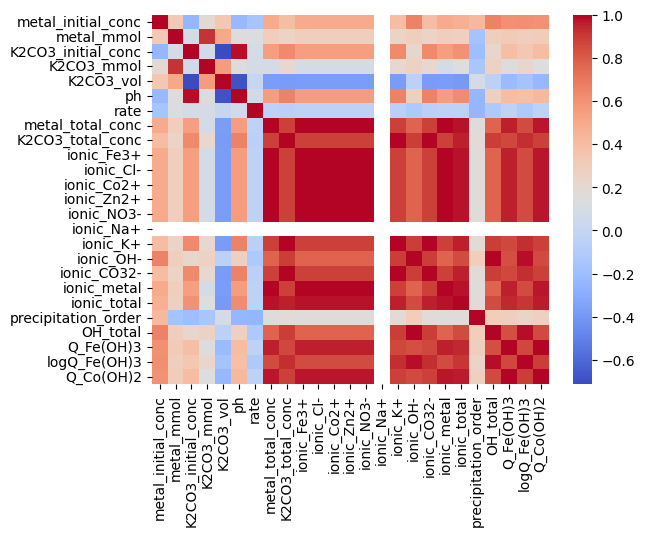

In [6]:
correlation_matrix  = X.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [7]:
X = df.drop(columns=[y_label, 'FeCl3', 'ionic_Na+'])

# Compute the correlation matrix
corr_matrix = X.corr().abs()

# Define threshold
threshold = 0.55

# Find columns to drop based on high correlation
columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if np.abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the columns
X = X.drop(columns=columns_to_drop)
X


,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,1.00,0.5000,0.45,1,1
1,1.39,1.0008,0.29,2,1
2,1.00,0.5000,0.15,1,1
3,1.13,0.9900,0.32,2,0
4,1.37,1.0000,0.31,2,0
...,...,...,...,...,...
65,1.04,1.0000,0.30,6,0
66,1.00,0.5000,0.45,6,1
67,0.93,1.0044,0.33,1,1
68,0.17,1.0000,0.41,6,0


<AxesSubplot: >

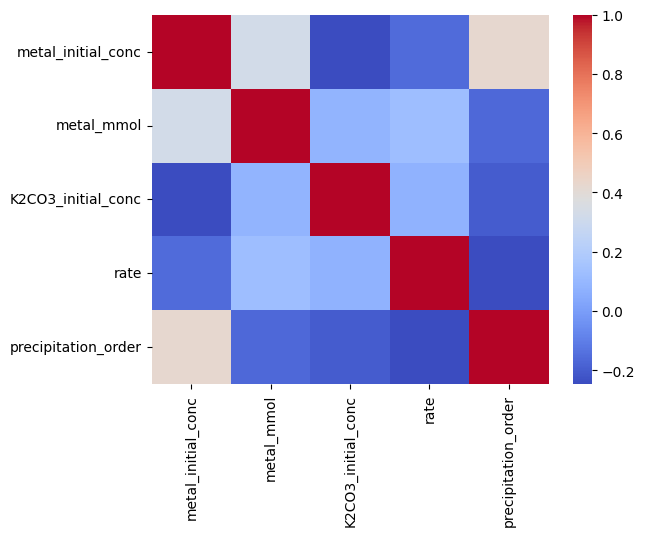

In [8]:
# New coorelation matrix

reduced_correlation_matrix  = X.corr(numeric_only=True)
sns.heatmap(reduced_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

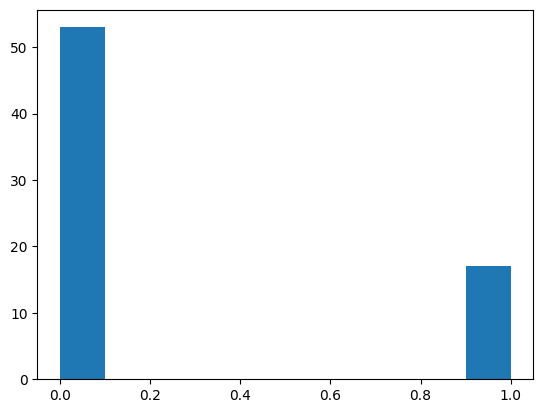

In [9]:
plt.hist(y)

## Using kernel learning

In [51]:
def kernel_numeric(x1, x2, kernel_type='RBF', gamma=1.0):
    """
    Compute kernel between two vectors.
    
    Parameters:
    - x1, x2: Input vectors.
    - kernel_type: Type of the kernel to use ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).
    
    Returns:
    - The kernel value based on the selected kernel type.
    """
    if kernel_type == 'Euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))
    elif kernel_type == 'Manhattan':
        return np.sum(np.abs(x1 - x2))
    elif kernel_type == 'RBF':
        distance_squared = np.sum((x1 - x2) ** 2)
        return np.exp(-gamma * distance_squared)

def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    """
    Compute distances or kernel values between two sets of vectors.

    Parameters:
    - X1, X2: Input datasets. Each should be a NumPy array of shape (n_samples, n_features).
    - kernel_type: Type of the metric or kernel to compute ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).

    Returns:
    - A matrix of distances or kernel values.
    """
    # Calculate the pairwise difference matrix
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]


    if kernel_type == 'Euclidean':
        # Compute Euclidean distance
        distances = np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        # Compute Manhattan distance
        distances = np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        # Compute RBF kernel
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        distances = np.exp(-gamma * distance_squared)
    else:
        raise ValueError("Unsupported kernel type")

    return distances


In [52]:
#%% define random forest model for classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
# xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tqdm import tqdm

rfc = RandomForestClassifier(
    n_estimators=300, 
    # bootstrap=False,
    # max_features=5,
    # max_depth=5,
    # n_jobs=-1,
    random_state=1,
#     class_weight='balanced'
    )

kernel_classifier = SVC(kernel='rbf', probability=True, random_state=42,class_weight='balanced')

xgb = XGBClassifier(
        learning_rate=0.1,
        reg_lambda = 0.1,
        n_estimators=1000, 
#         num_parallel_tree=5,
#         max_depth = 50,
        random_state=None,
        tree_method='hist',
#     colsample_bytree=0.8
        )


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import MinMaxScaler
kernel = 1e-1 * RBF(1e-3)  # RBF Kernel with given length scale
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)


clf = xgb

# Initialize LeaveOneOut
loo = LeaveOneOut()

# Array to store the predictions for each sample
predictions = np.zeros(len(y))
# Perform LOOCV
for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # # Standardize each feature
    scaler = MinMaxScaler()
#     scaler = StandardScaler()
    kernel_type = 'Euclidean'
    X_train_S = scaler.fit_transform(X_train)
    X_test_S = scaler.transform(X_test)
    X_train_sfs = compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)


    X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type)

    # Fit the model
    clf = kernel_classifier
    clf.fit(X_train_sfs, y_train)
    
    # Make predictions and store them
    predictions[test_index] = clf.predict(X_test_sfs)
    # break


print(f'LOOCV estimate predictions: {predictions}')

Processing LeaveOneOut: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 341.59it/s]

LOOCV estimate predictions: [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.]


In [53]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

# Define the classifier
clf = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

# Initialize LeaveOneOut
loo = LeaveOneOut()

# Arrays to store the predictions and uncertainties for each sample
predictions = np.zeros(len(y))
uncertainties = np.zeros(len(y))

# Perform LOOCV
for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize each feature
    scaler = MinMaxScaler()
    X_train_S = scaler.fit_transform(X_train)
    X_test_S = scaler.transform(X_test)
    X_train_sfs = compute_distances(X_train_S, X_train_S, kernel_type='Euclidean')
    X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type='Euclidean')

    # Fit the model
    clf.fit(X_train_sfs, y_train)
    
    # Make predictions and store them
    decision_function = clf.decision_function(X_test_sfs)
#     print(clf.predict_proba(X_test_sfs))
#     print(decision_function)
    predictions[test_index] = clf.predict(X_test_sfs)
    uncertainties[test_index] = np.abs(decision_function)
#     break

# Un certainty is defined based on distance from decision boundary.
# Normalizing uncertainties to range [0, 1] for better interpretation
uncertainties = 1 - uncertainties / np.max(uncertainties)

print(f'LOOCV estimate predictions: {predictions}')
print(f'Uncertainty estimates: {uncertainties}')

Processing LeaveOneOut: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 358.63it/s]

LOOCV estimate predictions: [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.]
Uncertainty estimates: [0.39938245 0.30033347 0.35523812 0.34137636 0.29903443 0.65542955
 0.32242238 0.39042634 0.12582951 0.45001397 0.35526033 0.36444441
 0.82555215 0.82744941 0.29996024 0.35521105 0.65942085 0.58204526
 0.48716037 0.65942085 0.61568345 0.35502988 0.19639238 0.35521105
 0.11680302 0.52979148 0.41534989 0.32274583 0.72426947 0.35523812
 0.25871654 0.85990581 0.97750418 0.20851296 0.35064899 0.3685198
 0.35905702 0.42733053 0.95228406 0.35523812 0.60579441 0.51431505
 0.91030486 0.3458709  0.71439108 0.         0.60249794 0.25630998
 0.91030486 0.82744941 0.17410599 0.2169449  0.35522658 0.61568345
 0.52836635 0.3392223  0.95228406 0.60579441 0.35521105 0.3392223
 0.67028543 0.51344397 0.17031094 0.6723173  0.62040815 0.91421857


In [62]:
grid_uncertainties

array([0.15737119, 0.47529294, 0.07451674, ..., 0.05628269, 0.05628267,
       0.05628267])

In [56]:
compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)

array([[0.        , 0.64606848, 0.88235294, ..., 1.        , 0.51454576,
        1.49468093],
       [0.64606848, 0.        , 0.60456709, ..., 1.0086647 , 0.28170753,
        1.3942791 ],
       [0.88235294, 0.60456709, 0.        , ..., 1.33362165, 0.64843402,
        1.67481502],
       ...,
       [1.        , 1.0086647 , 1.33362165, ..., 0.        , 1.1246143 ,
        1.11088752],
       [0.51454576, 0.28170753, 0.64843402, ..., 1.1246143 , 0.        ,
        1.45774185],
       [1.49468093, 1.3942791 , 1.67481502, ..., 1.11088752, 1.45774185,
        0.        ]])

LOOCV estimate accuracy: 0.843
LOOCV estimate balanced accuracy: 0.836
LOOCV estimate AUC: 0.836


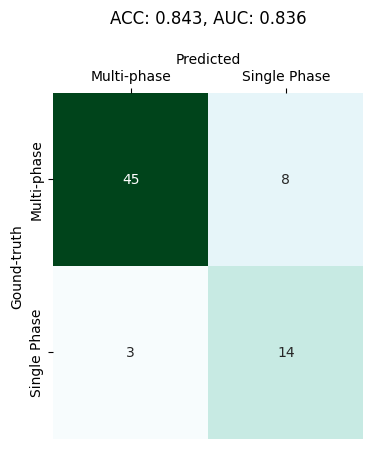

In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score



# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'LOOCV estimate accuracy: {accuracy:.3f}')

# calculation balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, predictions)
print(f'LOOCV estimate balanced accuracy: {balanced_accuracy:.3f}')

# Calculate AUC
auc = roc_auc_score(y, predictions)
print(f'LOOCV estimate AUC: {auc:.3f}')

#%% confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y, predictions)

# Convert to DataFrame and replace 0 and 1
confuse_matrix_df = pd.DataFrame(confuse_matrix, 
                                 columns=['Multi-phase', 'Single Phase'], 
                                 index=['Multi-phase', 'Single Phase'])



# plot confuse matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confuse_matrix_df, annot=True, cbar=False, cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('Gound-truth')
# show x label and x ticks on the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
# set fig size
plt.gcf().set_size_inches(4, 4.5)

# add metrics to the title
plt.title(f'ACC: {accuracy:.3f}, AUC: {auc:.3f}\n',fontsize=12)
plt.savefig('confusion_matrix.png', dpi=400,  bbox_inches='tight')

#%%
# train on the whole dataset
# clf.fit(X, y)

#%%
# get feature importance
# feature_importance = clf.feature_importances_
# feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Feature importance'])
# feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
# # plot feature importance
# feature_importance_df.plot(kind='barh', figsize=(6, 8))

## Defining the grid

In [98]:
import random
from itertools import product

param_grid = {
    'metal_initial_conc': np.arange(0.2, 3.2, 0.2),
    'metal_mmol': np.arange(0.2, 2.2, 0.2),
    'K2CO3_initial_conc': np.arange(0.1, 0.5, 0.05),
    'rate': range(1, 19),
    'precipitation_order': [0, 1]
}

param_combinations = list(product(
    param_grid['metal_initial_conc'],
    param_grid['metal_mmol'],
    param_grid['K2CO3_initial_conc'],
    param_grid['rate'],
    param_grid['precipitation_order']
))

def sample_parameters_from_grid(grid, n_samples=10):
    sampled_combinations = random.sample(grid, n_samples)
    sampled_parameters = [
        {
            'metal_initial_conc': comb[0],
            'metal_mmol': comb[1],
            'K2CO3_initial_conc': comb[2],
            'rate': comb[3],
            'precipitation_order': comb[4]
        }
        for comb in sampled_combinations
    ]
    return sampled_parameters

sampled_parameters = sample_parameters_from_grid(param_combinations, n_samples=10)
df_sampled_parameters = pd.DataFrame(param_combinations, columns=['metal_initial_conc',
                                                                  'metal_mmol', 'K2CO3_initial_conc',
                                                                 'rate', 'precipitation_order'])

df_sampled_parameters

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,0.2,0.2,0.10,1,0
1,0.2,0.2,0.10,1,1
2,0.2,0.2,0.10,2,0
3,0.2,0.2,0.10,2,1
4,0.2,0.2,0.10,3,0
...,...,...,...,...,...
43195,3.0,2.0,0.45,16,1
43196,3.0,2.0,0.45,17,0
43197,3.0,2.0,0.45,17,1
43198,3.0,2.0,0.45,18,0


In [99]:
X_gird_S = scaler.transform(df_sampled_parameters)
X_grid_sfs = compute_distances(X_gird_S, X_train_S, kernel_type='Euclidean')

grid_predictions = clf.predict(X_grid_sfs)
grid_decision_function = clf.decision_function(X_grid_sfs)
grid_uncertainties = 1 - np.abs(grid_decision_function)/np.max(np.abs(grid_decision_function))

(array([  578.,  1629.,  2241.,  2740.,  2925.,  3123.,  3229.,  3371.,
         3808., 19556.]),
 array([0.        , 0.09998009, 0.19996018, 0.29994027, 0.39992035,
        0.49990044, 0.59988053, 0.69986062, 0.79984071, 0.8998208 ,
        0.99980089]),
 <BarContainer object of 10 artists>)

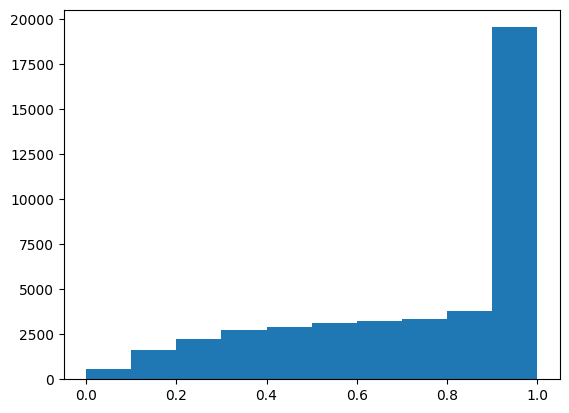

In [100]:
plt.hist(grid_uncertainties)

In [111]:
df_sampled_parameters['single phase'] = grid_predictions
df_sampled_parameters['uncertainty'] = grid_uncertainties
df_sampled_parameters_sorted = df_sampled_parameters.sort_values(by=['single phase', 'uncertainty'],
                                                                 ascending=[False, False],
                                                                ).reset_index(drop=True)
df_sampled_parameters_sorted.to_csv('../data/sorted_experiment_conditions.csv', index=False)
df_sampled_parameters_sorted

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,single phase,uncertainty
0,0.8,0.2,0.10,2,0,1.0,0.999659
1,1.0,0.2,0.40,3,0,1.0,0.998635
2,2.0,0.8,0.45,6,0,1.0,0.998275
3,2.6,0.2,0.15,3,1,1.0,0.998181
4,2.4,0.4,0.30,1,0,1.0,0.998082
...,...,...,...,...,...,...,...
43195,1.0,1.8,0.35,4,1,0.0,0.005434
43196,0.6,1.8,0.30,4,1,0.0,0.001466
43197,0.8,1.8,0.30,4,1,0.0,0.000840
43198,0.6,1.8,0.35,4,1,0.0,0.000314


In [112]:
df_sampled_parameters_sorted.head(20)

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,single phase,uncertainty
0,0.8,0.2,0.10,2,0,1.0,0.999659
1,1.0,0.2,0.40,3,0,1.0,0.998635
2,2.0,0.8,0.45,6,0,1.0,0.998275
3,2.6,0.2,0.15,3,1,1.0,0.998181
4,2.4,0.4,0.30,1,0,1.0,0.998082
5,3.0,0.2,0.30,1,1,1.0,0.997650
6,1.4,1.4,0.35,6,0,1.0,0.997587
7,1.2,0.2,0.45,4,0,1.0,0.997561
8,2.6,0.4,0.10,1,0,1.0,0.997307
9,0.6,0.2,0.25,2,0,1.0,0.997009
